# Lasso regression L-1 
Lasso regression, short for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that includes a regularization term to prevent overfitting and enhance model accuracy.

### Key Features
__1.Regularization__:
Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients.
This penalty term is controlled by a parameter, often denoted as λ
 (lambda).

__2.Variable Selection__:
Lasso can shrink some coefficients to exactly zero, effectively performing feature selection. This results in a simpler, more interpretable model.

___3.Objective Function__:
The objective function for Lasso regression is:Minimize(i=1∑n​(yi​−y^​i​)2+λj=1∑p​∣βj​∣)
where:
( y_i ) is the actual value.
( \hat{y}_i ) is the predicted value.
( \beta_j ) are the coefficients.
( \lambda ) is the regularization parameter.

### Scikit implementation

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression


In [126]:
from sklearn.datasets import make_regression

X = np.random.rand(100, 1)
y = 30 * X + 2 + np.random.randn(100, 1) / 5


print(X.shape ,y.shape)

alphas = [0,1,20  ,4]

(100, 1) (100, 1)


c:\Users\Ankit Chaudhary\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ankit Chaudhary\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Ankit Chaudhary\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.934e+00, tolerance: 7.440e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fit

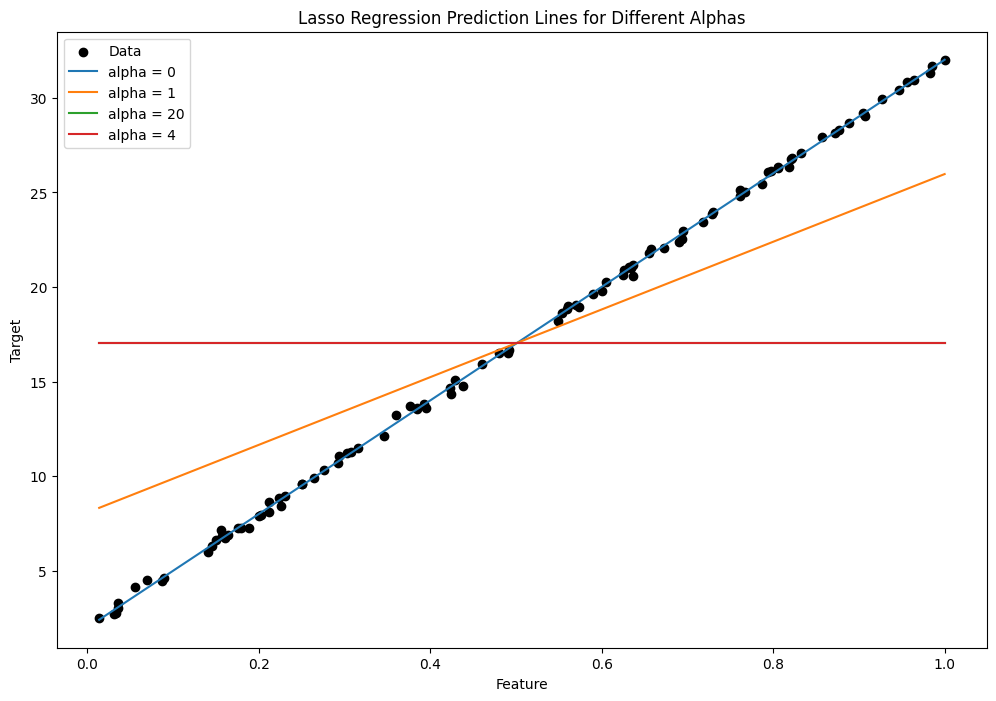

In [127]:
plt.figure(figsize=(12, 8))

# Scatter plot of the original data
plt.scatter(X, y, color='black', label='Data')

# Generate a range of values for prediction
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_plot = lasso.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f'alpha = {alpha}')  # Adjust alpha for visibility

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Lasso Regression Prediction Lines for Different Alphas')
plt.legend()
plt.show()


### Advantages
__Reduces Overfitting__: 
By adding a penalty, it reduces the complexity of the model, which helps in preventing overfitting.

__Feature Selection__: 
Automatically selects important features by shrinking less important feature coefficients to zero.

 ### __Lasso(L1) From Scratch__

In [128]:
class Lasso2d:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.b = 0
        self.m = 0

    def fit(self,X,y):
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        m_num = 0
        m_den = 0

        for i in range(X.shape[0]):
            m_num += (y[i]-y_mean)*(X[i]-x_mean)
            m_den += (X[i] - x_mean)**2
        
        s = m_num  / m_den
        if s > 0:
             self.m = (m_num - self.alpha) / m_den
        elif s < 0:
             self.m = (m_num + self.alpha) / m_den
        else:
             self.m = m_num / m_den
        

        self.b = y_mean - self.m*x_mean
   
    def predict(self , x_test):
        return self.m*x_test + self.b


In [129]:
from sklearn.linear_model import Ridge
lass = Lasso(alpha=2)
llr =  Lasso2d(alpha=2)
ridge = Ridge(alpha = 2)
lass.fit(X,y)
llr.fit(X,y)
ridge.fit(X,y)

print(F"lasso -Sklearn :{lass.coef_, lass.intercept_}")
print(F" Ridge  :{ridge.coef_, ridge.intercept_}")
print(F" my class=  :{llr.m, llr.b}")

lasso -Sklearn :(array([5.77100101]), array([14.15413589]))
 Ridge  :(array([[24.17140794]]), array([4.93002046]))
 my class=  :(array([29.79413314]), array([2.11135094]))
